In [ ]:
conda activate ProjectML
pip install pyzmq
pip install ipykernel
pip install seaborn
pip install neptune-client==0.9.4
pip install Sklearn
pip install qgrid

In [5]:
%pylab inline
import numpy as numpy
#import modin.pandas as pd
import pandas as pd
import seaborn as sns
import neptune.new as neptune
from sklearn.model_selection import train_test_split
import qgrid
import os
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [7]:
!ls data

test_data.csv  train_data.csv  train_labels.csv


In [9]:
run = neptune.init(project='ikarpicka/ProjectML',
                   api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0NDBkZGQxZC1iZDE0LTQwZjAtYTlhYS1jMzgxYWM4ZWYwMGYifQ==')

psutil is not installed. Hardware metrics will not be collected.
https://app.neptune.ai/ikarpicka/ProjectML/e/PROJ-14


In [11]:
df_train = pd.read_csv(os.path.join('data', 'train_data.csv'), header=None)
df_test = pd.read_csv(os.path.join('data', 'test_data.csv'), header=None)
df_train_labels = pd.read_csv(os.path.join('data', 'train_labels.csv'), header=None)

In [13]:
#pd.set_option('display.max_columns', None)

In [15]:
print(df_train.shape, df_test.shape, df_train_labels.shape)

(3750, 10000) (1250, 10000) (3750, 1)


df_train

In [17]:
df_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2269,46.323,305.639,75292.338,83523.150,-18632.473,-651.702,-4.614,-101.039,948.199,548.169,...,235.774,407.307,413.100,633.768,928.534,836.701,270.889,-478.172,55.900,-412.048
323,653.435,-153.461,21968.864,23944.365,-49812.840,-979.750,-583.437,-1031.321,-329.304,3.240,...,-493.213,-518.922,386.841,-525.548,615.749,485.658,-323.706,619.290,-522.386,670.857
2535,488.624,323.756,42078.497,65226.566,-5212.553,686.679,1323.012,-1028.829,900.930,259.969,...,84.911,242.276,399.812,316.375,149.808,-346.080,-120.900,-270.861,-1420.558,-28.537
2871,228.928,497.287,1039.298,-23207.311,-24920.736,-593.241,936.839,-826.000,162.540,-140.562,...,-454.167,-153.049,79.549,449.898,-119.987,1602.063,20.064,-316.066,39.669,68.067
1283,-317.167,264.219,-13547.622,-44167.703,27858.281,328.829,1514.041,263.488,510.459,382.491,...,18.787,203.191,75.748,133.199,395.479,500.679,189.028,-9.654,-691.600,42.739


In [19]:
df_train.describe()

Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-06-18T19:51:40.059Z


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,...,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,...,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.781750,-135.343500,-29284.119500,-38028.429000,-14426.799500,-448.696750,-590.170250,-562.956500,-349.689750,-144.157750,...,-169.777250,-352.959500,-154.639750,-328.083750,-550.599000,-432.000750,-129.076250,-561.304000,-424.192750,-462.828000
50%,35.478500,2.680500,1181.698500,980.588000,-154.835000,13.931500,13.674000,16.750500,9.731000,11.159500,...,18.700000,38.348500,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780500,156.095750,29630.914500,40561.960250,14515.833000,506.893250,630.490750,608.698000,383.110500,179.768250,...,196.049000,396.868500,198.237250,356.185500,574.453250,425.338000,149.855750,539.550000,427.794500,552.173500
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [21]:
df_train.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0.01,-623.20929,-490.92517,-100158.64224,-129347.05008,-52191.05776,-1574.59148,-2003.85577,-1970.94667,-1198.11057,-533.06197,...,-630.03945,-1250.87874,-604.35879,-1154.21806,-1792.58412,-1553.43497,-471.95681,-1766.06269,-1413.92194,-1766.43255
0.25,-163.78175,-135.34350,-29284.11950,-38028.42900,-14426.79950,-448.69675,-590.17025,-562.95650,-349.68975,-144.15775,...,-169.77725,-352.95950,-154.63975,-328.08375,-550.59900,-432.00075,-129.07625,-561.30400,-424.19275,-462.82800
0.50,35.47850,2.68050,1181.69850,980.58800,-154.83500,13.93150,13.67400,16.75050,9.73100,11.15950,...,18.70000,38.34850,26.19950,14.57550,1.36350,-3.79650,8.60050,-4.24300,-7.62800,28.10700
0.75,215.78050,156.09575,29630.91450,40561.96025,14515.83300,506.89325,630.49075,608.69800,383.11050,179.76825,...,196.04900,396.86850,198.23725,356.18550,574.45325,425.33800,149.85575,539.55000,427.79450,552.17350
0.99,708.01659,494.80515,103871.64502,132816.82221,51609.80433,1706.45871,2119.21102,2006.27674,1223.18649,561.29211,...,638.02937,1267.47739,631.32286,1191.95385,1885.54150,1591.82639,473.63691,1931.72142,1452.60934,1800.38792


In [23]:
def check_missing():
    for column in df_train.columns:
        missing = column, df_train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

print(check_missing())

None


In [25]:
q1 = df_train.quantile(0.25) 
q3 =df_train.quantile(0.75) 
iqr = q3 - q1
print(iqr)

0         379.56225
1         291.43925
2       58915.03400
3       78590.38925
4       28942.63250
           ...     
9995      857.33875
9996      278.93200
9997     1100.85400
9998      851.98725
9999     1015.00150
Length: 10000, dtype: float64


In [27]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df_train[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df_train[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                               'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

print(outliers_15iqr)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -733.125125      785.123875                 14                 14
1        -572.502375      593.254625                 11                 12
2     -117656.670500   118003.465500                 15                 14
3     -155914.012875   158447.544125                  9                  9
4      -57840.748250    57929.781750                 14                 17
...              ...             ...                ...                ...
9995    -1718.008875     1711.346125                 16                 22
9996     -547.474250      568.253750                 13                  6
9997    -2212.585000     2190.831000                  8                 15
9998    -1702.173625     1705.775375                  8                 15
9999    -1985.330250     2074.675750                 16                 16

[10000 rows x 4 columns]


In [29]:
df_train.skew()
df_train.kurtosis().abs().sort_values()
df_train.agg(['kurtosis', 'skew']).T

,kurtosis,skew
0,0.010253,0.023915
1,-0.004958,0.036784
2,0.009133,-0.001958
3,-0.024319,-0.017559
4,0.119193,0.017595
...,...,...
9995,0.156313,0.037435
9996,-0.065115,-0.041411
9997,0.079554,0.078989
9998,-0.059513,0.040062


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

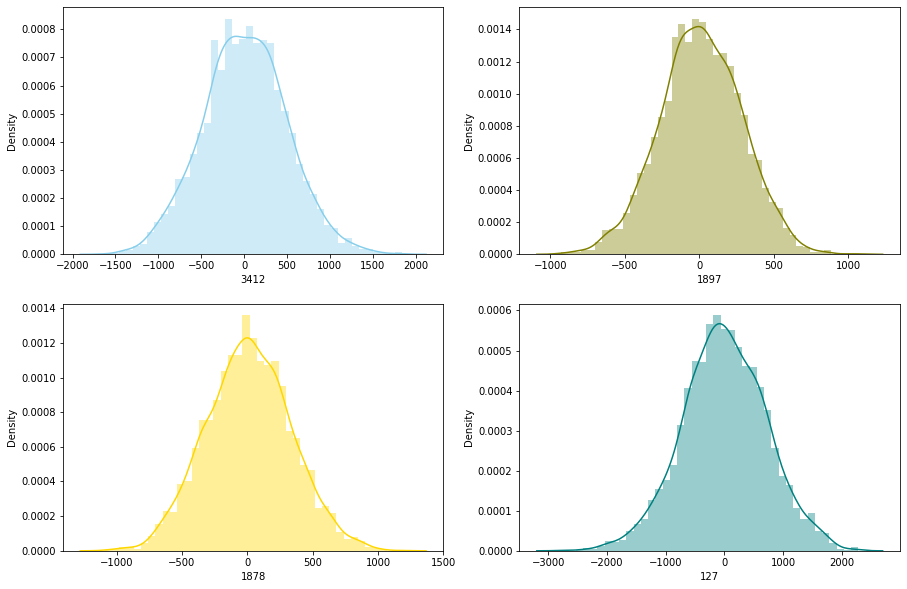

In [31]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df_train[random.randint(3750)], color='skyblue', ax=axes[0, 0])
sns.distplot(df_train[random.randint(3750)], color='olive', ax=axes[0, 1])
sns.distplot(df_train[random.randint(3750)], color='gold', ax=axes[1, 0])
sns.distplot(df_train[random.randint(3750)], color='teal', ax=axes[1, 1])
plt.show();

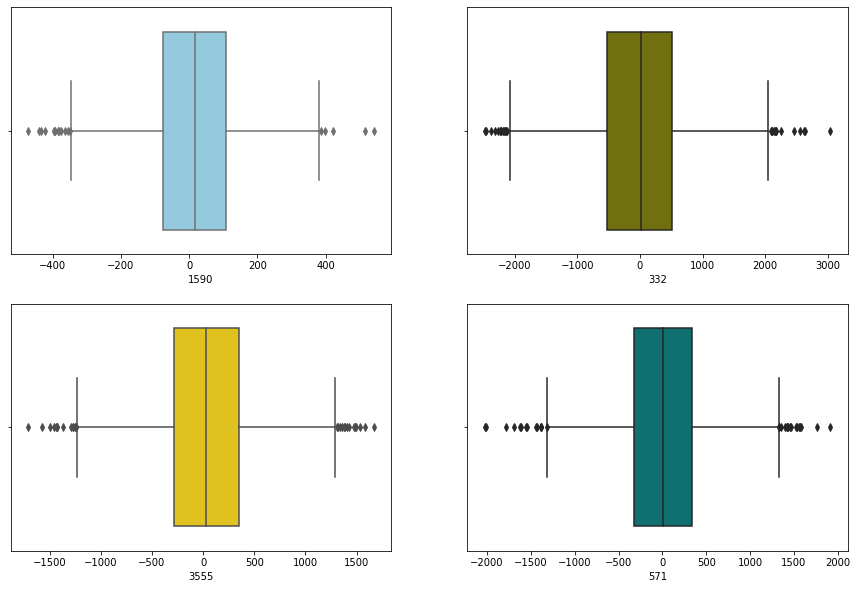

In [33]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df_train[random.randint(3750)], color='skyblue', ax=axes[0, 0])
sns.boxplot(x=df_train[random.randint(3750)], color='olive', ax=axes[0, 1])
sns.boxplot(x=df_train[random.randint(3750)], color='gold', ax=axes[1, 0])
sns.boxplot(x=df_train[random.randint(3750)], color='teal', ax=axes[1, 1])
plt.show();

In [35]:
feature = np.random.randint(3750)

alpha = 0.05
p_value = scipy.stats.normaltest(df_train[feature])[1]
if p_value < alpha:
    print('The null hypothesis was rejected for the variable {}. The variable does not come from the normal distribution. P-value: {}'.format(feature, p_value))
else:
    print('For the variable {} no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: {}'.format(feature, p_value))

For the variable 2426 no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: 0.07474086123008689


df_test

In [37]:
df_test.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1242,-14.438,29.527,-3370.708,-108921.429,-23119.111,-804.160,-1156.000,-56.835,-798.972,-90.960,...,-443.274,-652.793,-99.224,-27.462,1.928,263.067,200.909,301.269,341.331,959.972
793,54.754,-178.961,-18087.884,-70290.947,14098.636,-869.196,1900.467,-52.217,1047.089,-191.291,...,-13.869,-204.460,-1.248,-442.259,-342.128,196.225,259.783,-425.174,829.413,-754.838
310,121.470,88.380,-17752.999,-98946.444,813.682,-6.359,311.412,-611.364,707.611,107.584,...,-388.493,502.132,59.727,49.282,-1423.931,113.582,377.781,706.893,-337.211,-186.928
76,-30.004,-101.250,-49938.837,9149.199,25966.414,720.578,385.134,-138.646,177.547,-27.983,...,536.984,-127.289,-28.612,527.018,441.123,-460.645,-128.067,920.356,197.269,-522.861
1135,97.405,4.547,-79935.940,66387.430,-1907.077,466.319,-425.341,-417.771,-272.348,56.047,...,291.735,88.598,487.275,-369.365,-111.586,-182.593,50.693,1276.024,1078.652,-2400.242


In [39]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,6.892262,24.231871,691.035041,-923.186420,472.853216,-5.603389,-8.430038,18.087694,45.521371,5.532402,...,11.476222,33.046902,14.964225,1.617977,0.966285,27.937748,17.698405,-5.434074,2.335376,18.155565
std,279.865345,208.490530,43757.863316,57126.680674,21901.701715,713.053055,920.126198,878.797561,522.835391,228.835834,...,269.321713,545.254843,279.002383,484.089443,811.995519,668.026761,205.254268,795.507890,618.042044,777.694783
min,-1105.426000,-649.565000,-155113.836000,-184240.160000,-91291.593000,-2035.416000,-2908.191000,-2716.201000,-1637.602000,-841.328000,...,-754.360000,-2337.359000,-843.832000,-1660.371000,-3048.856000,-1897.451000,-656.654000,-2452.794000,-2080.857000,-2991.225000
25%,-176.906000,-116.729500,-27510.364750,-41059.084000,-13750.416000,-520.422750,-635.170750,-562.046500,-343.264000,-154.387000,...,-178.323000,-326.482750,-177.293750,-334.303250,-533.827500,-395.463000,-128.044750,-539.452750,-416.250500,-510.043500
50%,12.362000,20.508000,-444.999500,-397.729500,765.368500,-8.634000,38.824500,6.567500,42.814500,13.917000,...,12.929500,14.458000,18.659500,3.275500,-7.966500,26.660500,25.876000,11.653000,-1.106000,26.721500
75%,185.231250,171.514250,31295.237500,36278.893000,14594.061750,493.204250,625.198250,613.078500,406.646750,161.198250,...,199.985000,381.024250,205.077500,335.198500,573.268250,465.582000,157.331750,548.572500,424.111750,554.481750
max,1053.495000,736.906000,141244.534000,177561.749000,60844.690000,2397.488000,2987.201000,2916.440000,1765.077000,684.350000,...,1093.874000,2010.261000,914.288000,1647.605000,2444.526000,2412.412000,610.140000,2354.781000,1989.205000,2157.461000


In [41]:
df_test.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0.01,-674.88507,-450.58522,-106862.75381,-133078.89192,-52345.21522,-1491.10937,-2198.97393,-2023.70981,-1146.67588,-553.33006,...,-568.52008,-1326.01747,-625.02518,-1140.88678,-1836.62622,-1541.88099,-471.72772,-1794.33371,-1418.60502,-1812.47154
0.25,-176.90600,-116.72950,-27510.36475,-41059.08400,-13750.41600,-520.42275,-635.17075,-562.04650,-343.26400,-154.38700,...,-178.32300,-326.48275,-177.29375,-334.30325,-533.82750,-395.46300,-128.04475,-539.45275,-416.25050,-510.04350
0.50,12.36200,20.50800,-444.99950,-397.72950,765.36850,-8.63400,38.82450,6.56750,42.81450,13.91700,...,12.92950,14.45800,18.65950,3.27550,-7.96650,26.66050,25.87600,11.65300,-1.10600,26.72150
0.75,185.23125,171.51425,31295.23750,36278.89300,14594.06175,493.20425,625.19825,613.07850,406.64675,161.19825,...,199.98500,381.02425,205.07750,335.19850,573.26825,465.58200,157.33175,548.57250,424.11175,554.48175
0.99,672.11646,517.08747,102341.97171,135846.83683,49078.11381,1672.37043,2128.63323,1963.88959,1277.95576,533.54247,...,642.88076,1251.38600,631.48557,1121.99078,1872.03356,1601.98693,473.67052,1812.64619,1485.68037,1723.91295


In [43]:
def check_missing():
    for column in df_test.columns:
        missing = column, df_test[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

print(check_missing())

None


In [45]:
q1 = df_test.quantile(0.25) 
q3 = df_test.quantile(0.75) 
iqr = q3 - q1
print(iqr)

0         362.13725
1         288.24375
2       58805.60225
3       77337.97700
4       28344.47775
           ...     
9995      861.04500
9996      285.37650
9997     1088.02525
9998      840.36225
9999     1064.52525
Length: 10000, dtype: float64


In [47]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df_test[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df_test[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                               'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

print(outliers_15iqr)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -720.111875      728.437125                  9                  7
1        -549.095125      603.879875                  4                  2
2     -115718.768125   119503.640875                  9                  1
3     -157066.049500   152285.858500                  2                  8
4      -56267.132625    57110.778375                 10                  2
...              ...             ...                ...                ...
9995    -1687.030500     1757.149500                  4                  7
9996     -556.109500      585.396500                  5                  3
9997    -2171.490625     2180.610375                  6                  3
9998    -1676.793875     1684.655125                  2                  2
9999    -2106.831375     2151.269625                  6                  1

[10000 rows x 4 columns]


In [49]:
df_test.skew()
df_test.kurtosis().abs().sort_values()
df_test.agg(['kurtosis', 'skew']).T

,kurtosis,skew
0,0.424115,-0.038244
1,-0.018814,0.048131
2,0.153853,-0.097425
3,-0.043693,0.055751
4,0.448668,-0.205048
...,...,...
9995,0.059392,0.038944
9996,-0.122063,-0.117525
9997,-0.124856,-0.015890
9998,-0.064332,0.009265


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

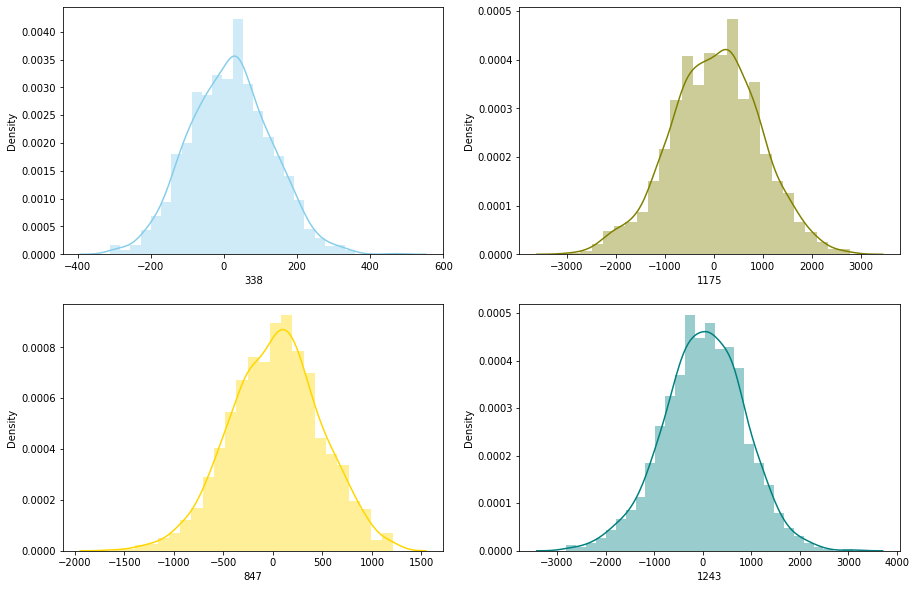

In [51]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df_test[random.randint(1250)], color='skyblue', ax=axes[0, 0])
sns.distplot(df_test[random.randint(1250)], color='olive', ax=axes[0, 1])
sns.distplot(df_test[random.randint(1250)], color='gold', ax=axes[1, 0])
sns.distplot(df_test[random.randint(1250)], color='teal', ax=axes[1, 1])
plt.show();

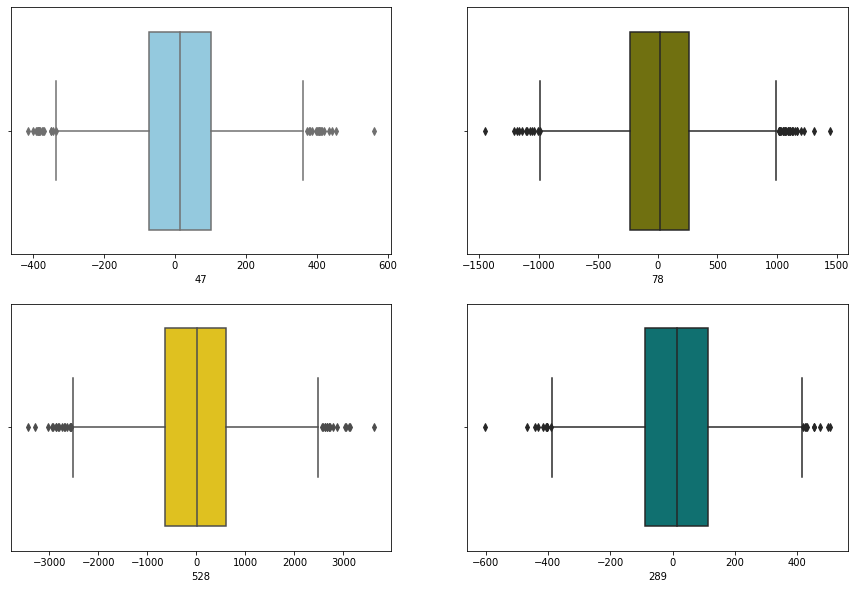

In [53]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df_train[random.randint(1250)], color='skyblue', ax=axes[0, 0])
sns.boxplot(x=df_train[random.randint(1250)], color='olive', ax=axes[0, 1])
sns.boxplot(x=df_train[random.randint(1250)], color='gold', ax=axes[1, 0])
sns.boxplot(x=df_train[random.randint(1250)], color='teal', ax=axes[1, 1])
plt.show();

In [55]:
feature = np.random.randint(1250)

alpha = 0.05
p_value = scipy.stats.normaltest(df_train[feature])[1]
if p_value < alpha:
    print('The null hypothesis was rejected for the variable {}. The variable does not come from the normal distribution. P-value: {}'.format(feature, p_value))
else:
    print('For the variable {} no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: {}'.format(feature, p_value))

For the variable 237 no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: 0.8583408776951584


df_train_labels

In [57]:
df_train_labels.sample(5) 

,0
1390,1
1341,1
2237,-1
3443,1
3175,1


In [59]:
def check_missing():
    for column in df_train.columns:
        missing = column, df_train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

check_missing()

In [61]:
df_train_labels.value_counts()

 1    3375
-1     375
dtype: int64

train_test_split, pca

In [113]:
X = df_train
y = df_train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, stratify = y)

In [114]:
X_train_standarized = StandardScaler().fit_transform(X_train)

In [115]:
pca = PCA(n_components = 2, whiten = True)

In [116]:
X_train_pca = pca.fit_transform(X_train_standarized)

In [117]:
X_train_pca = pd.DataFrame(X_train_pca, columns = ['c1', 'c2'])
X_train_pca = X_train_pca.assign(labels=(y_train).values)
X_train_pca.sample(5)

,c1,c2,labels
794,1.250192,-0.083378,1
1556,-0.075703,2.433432,1
453,-0.824186,1.023814,1
1183,-0.331230,-0.026033,1
1879,2.087040,-0.337165,1


In [118]:
X_train_pca[['c1', 'c2']].describe()

,c1,c2
count,2.812000e+03,2.812000e+03
mean,-1.579265e-17,3.790235e-18
std,1.000000e+00,1.000000e+00
min,-3.250112e+00,-3.290732e+00
25%,-6.864313e-01,-6.869503e-01
50%,2.230897e-02,-1.372771e-02
75%,6.860938e-01,6.669436e-01
max,3.572913e+00,3.955327e+00


In [119]:
X_train_pca['labels'].sample(5)

229     1
2798   -1
1839    1
2452    1
218     1
Name: labels, dtype: int64

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


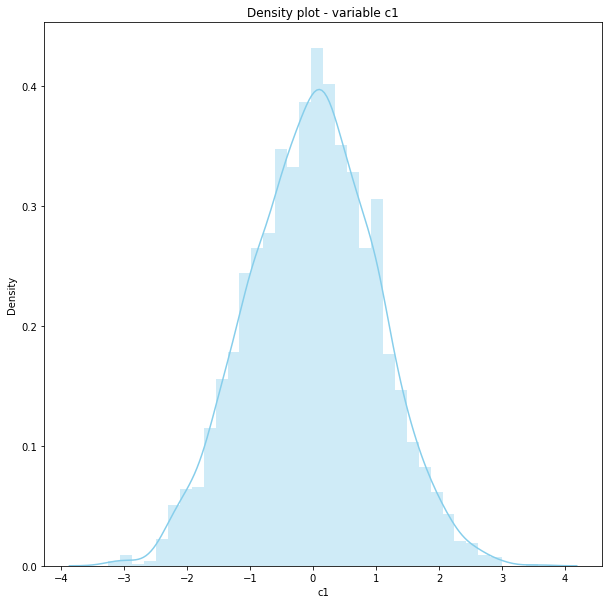

In [120]:
plt.figure(figsize=(10, 10))
sns.distplot(X_train_pca.c1, color = 'skyblue').set(title = 'Density plot - variable c1')
plt.show()

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


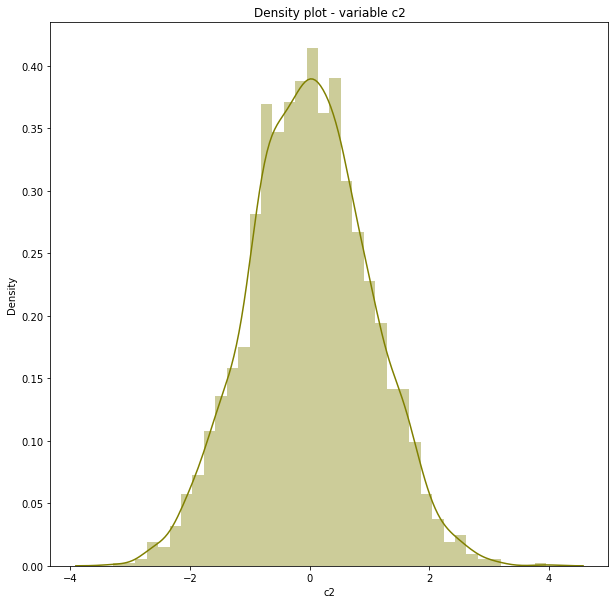

In [121]:
plt.figure(figsize=(10, 10))
sns.distplot(X_train_pca.c2, color = 'olive').set(title = 'Density plot - variable c2')
plt.show()

<AxesSubplot:xlabel='c1', ylabel='c2'>

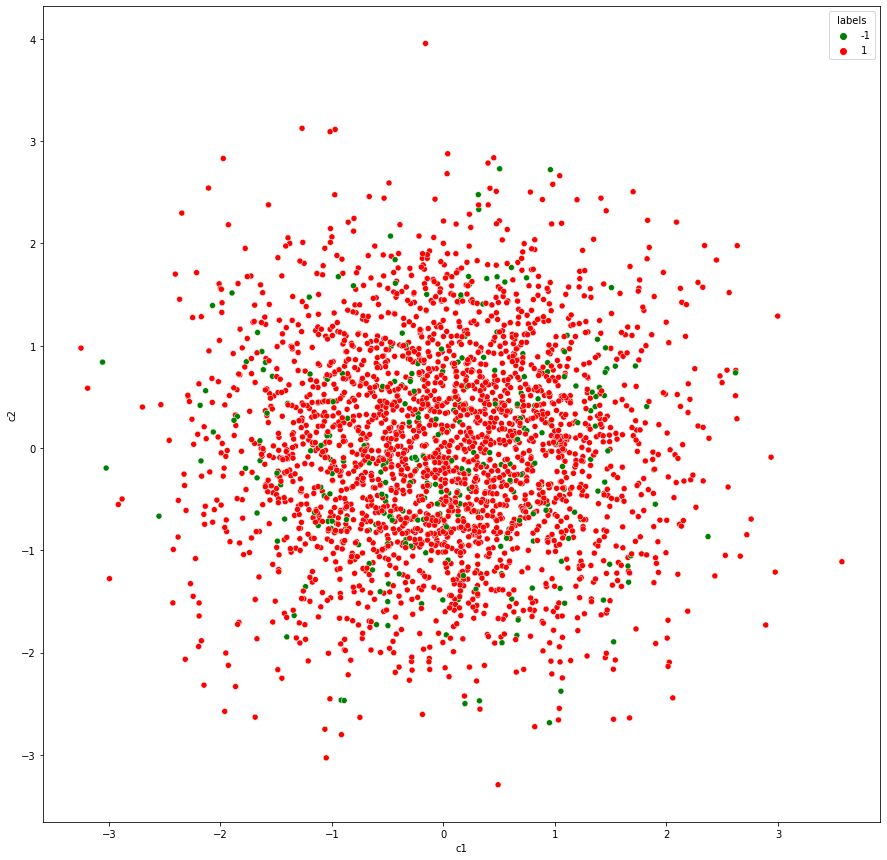

In [122]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data = X_train_pca, x = 'c1', y='c2', hue = X_train_pca['labels'], palette = ['green', 'red'])
